# 안녕하세요^^ 
## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구 별 유동인구 데이터" 를 확인해 보도록 하겠습니다

In [45]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.2 seoul_moving_month_4.csv

[데이터 소개]
* 서울 시 구별 이동 2022년 4월 데이터

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_4_step1.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 'seoul_moving_month_4_step1.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요
        * index column은 0번 열 입니다

In [46]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd

seoul_moving = pd.read_csv('1.2 seoul_moving_month_4.csv',sep=",", index_col = 0, encoding = 'UTF-8')

In [47]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(28923054, 10)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [48]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [49]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


In [50]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.4+ GB


* 1번 열의 의미
    * " 2022년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 H(야간상주지(집))으로 이동한 0 ~ 10세 여성은 총 27.52명이며 이들의 평균 이동시간은 10분이다

#### [실습문제3] 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '인구이동(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)

    - 해당 값을 나름의 기준으로 변경하세요

    - '인구이동(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [51]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.loc[seoul_moving['이동인구(합)'] == '*']

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
25,202204,일,0,11010,11010,F,25,HW,10,*
159,202204,일,0,11010,11010,M,40,HW,20,*
222,202204,일,0,11010,11020,F,20,HE,20,*
224,202204,일,0,11010,11020,F,20,EW,20,*
225,202204,일,0,11010,11020,F,20,WW,10,*
...,...,...,...,...,...,...,...,...,...,...
968425,202204,토,23,39000,11240,M,20,EW,60,*
968426,202204,토,23,39000,11240,M,20,EE,70,*
968439,202204,토,23,39000,11250,F,20,EE,80,*
968441,202204,토,23,39000,11250,F,30,EE,70,*


In [52]:
# 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체
seoul_moving['이동인구(합)'] = seoul_moving['이동인구(합)'].replace({'*':1.5}).astype(float)
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95
...,...,...,...,...,...,...,...,...,...,...
968458,202204,토,23,39000,11250,M,45,EH,50,3.16
968459,202204,토,23,39000,11250,M,50,EH,70,3.27
968460,202204,토,23,39000,11250,M,55,EE,50,3.31
968461,202204,토,23,39000,11250,M,55,EH,50,3.28


In [53]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.4+ GB


#### [실습문제4] 이동유형, 요일, 성별 변수의 value수를 파악

* 역시나 value_counts()를 활용해 봅시다.

In [55]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['이동유형'].value_counts()

EH    5757073
HE    5520005
EE    5085099
WH    3108026
WE    2809148
HW    2695189
EW    2304535
WW    1026134
HH     617845
Name: 이동유형, dtype: int64

In [56]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['요일'].value_counts()

토    4690806
금    4641881
목    4011291
수    3955646
화    3926876
월    3906272
일    3790282
Name: 요일, dtype: int64

* 4월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 4, 금 : 5, 토 : 5

In [57]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['성별'].value_counts()

M    16355029
F    12568025
Name: 성별, dtype: int64

#### [실습문제5] 어느 요일의 심야 이동이 가장 많을까요?

In [58]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
night_moving = seoul_moving.loc[(seoul_moving['도착시간'] >= 0) & (seoul_moving['도착시간'] <= 4)].groupby(by = ["요일"], as_index = False)["이동인구(합)"].sum()

night_moving.loc[night_moving['요일'].isin(['금', '토']), '이동인구(합)'] /= 5
night_moving.loc[~night_moving['요일'].isin(['금', '토']), '이동인구(합)'] /= 4

night_moving.sort_values(by = ["이동인구(합)"], ascending = False)

#토요일에 가장 많고, 월요일에 가장 적다

,요일,이동인구(합)
5,토,1.046640e+06
4,일,8.876776e+05
0,금,8.413047e+05
1,목,8.277936e+05
2,수,8.008194e+05
6,화,7.587887e+05
3,월,6.277580e+05


#### [실습문제6] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다!

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

In [59]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
only_seoul = seoul_moving.loc[(seoul_moving['출발 시군구 코드'] >= 11010) & (seoul_moving['출발 시군구 코드'] <= 11250) & 
                              (seoul_moving['도착 시군구 코드'] >= 11010) & (seoul_moving['도착 시군구 코드'] <= 11250)]

In [60]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
only_seoul

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95
...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,11250,11250,M,80,WH,10,85.10
920411,202204,토,23,11250,11250,M,80,EH,10,28.36
920412,202204,토,23,11250,11250,M,80,EE,20,37.99
920413,202204,토,23,11250,11250,M,80,HE,10,9.42


#### [실습문제7] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [61]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
only_seoul = only_seoul.rename(columns = {'출발 시군구 코드':'자치구(출발)'})
only_seoul['자치구(출발)'] = only_seoul['자치구(출발)'].map({
    11010:'종로구',
    11020:'중구',
    11030:'용산구',
    11040:'성동구',
    11050:'광진구',
    11060:'동대문구',
    11070:'중랑구',
    11080:'성북구',
    11090:'강북구',
    11100:'도봉구',
    11110:'노원구',
    11120:'은평구',
    11130:'서대문구',
    11140:'마포구',
    11150:'양천구',
    11160:'강서구',
    11170:'구로구',
    11180:'금천구',
    11190:'영등포구',
    11200:'동작구',
    11210:'관악구',
    11220:'서초구',
    11230:'강남구',
    11240:'송파구',
    11250:'강동구'
})

only_seoul.groupby(by = ["자치구(출발)"], as_index = False)["이동인구(합)"].sum().sort_values(by = ["이동인구(합)"], ascending = False)

#유출이 가장 많은 구: 강남구
#유출이 가장 적은 구: 금천구

,자치구(출발),이동인구(합)
0,강남구,46220924.63
17,송파구,36207933.02
14,서초구,29698071.20
19,영등포구,25835980.43
12,마포구,24517465.86
3,강서구,22526485.94
1,강동구,22035184.61
8,노원구,21392595.19
23,중구,20296645.78
22,종로구,19862431.70


In [62]:
# 30~65세 인구 그룹만을 대상으로 "only_seoul" 데이터프레임을 필터링합니다.
only_seoul_filtered_A = only_seoul[(only_seoul["나이"] >= 25) & (only_seoul["나이"] <= 65)]

# "자치구(출발)"과 "나이"로 그룹화하여 "이동인구(합)"의 총합을 계산하고, 내림차순으로 정렬합니다.
only_seoul_worker_A = only_seoul_filtered_A.groupby(by=["자치구(출발)", "나이"], as_index=False)["이동인구(합)"].mean()

only_seoul_worker_A = only_seoul_worker_A.rename(columns={'이동인구(합)': '직장인유출인구(평균)'})

#자치구별 직장인 연령대(30~65)의 유출인구의 평균
only_seoul_worker_out = only_seoul_worker_A.groupby(by=["자치구(출발)"])[["직장인유출인구(평균)"]].mean()
only_seoul_worker_out.sort_values(by=["직장인유출인구(평균)"], ascending=False)

,직장인유출인구(평균)
자치구(출발),
강남구,82.088191
송파구,75.006013
서초구,58.341105
강동구,56.011592
영등포구,54.203610
강서구,53.845900
마포구,47.582842
노원구,46.938891
관악구,44.591121


In [63]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
only_seoul = only_seoul.rename(columns = {'도착 시군구 코드':'자치구(도착)'})
only_seoul['자치구(도착)'] = only_seoul['자치구(도착)'].map({
    11010:'종로구',
    11020:'중구',
    11030:'용산구',
    11040:'성동구',
    11050:'광진구',
    11060:'동대문구',
    11070:'중랑구',
    11080:'성북구',
    11090:'강북구',
    11100:'도봉구',
    11110:'노원구',
    11120:'은평구',
    11130:'서대문구',
    11140:'마포구',
    11150:'양천구',
    11160:'강서구',
    11170:'구로구',
    11180:'금천구',
    11190:'영등포구',
    11200:'동작구',
    11210:'관악구',
    11220:'서초구',
    11230:'강남구',
    11240:'송파구',
    11250:'강동구'
})

only_seoul.groupby(by = ["자치구(도착)"], as_index = False)["이동인구(합)"].sum().sort_values(by = ["이동인구(합)"], ascending = False)

#유입이 가장 많은 구: 강남구
#유입이 가장 적은 구: 금천구

,자치구(도착),이동인구(합)
0,강남구,46152613.40
17,송파구,36156898.50
14,서초구,29763430.80
19,영등포구,25824111.41
12,마포구,24539297.75
3,강서구,22770901.22
1,강동구,21996357.39
8,노원구,21371821.86
23,중구,20275545.43
22,종로구,19809988.63


In [64]:
# 30~65세 인구 그룹만을 대상으로 "only_seoul" 데이터프레임을 필터링합니다.
only_seoul_filtered_B = only_seoul[(only_seoul["나이"] >= 25) & (only_seoul["나이"] <= 65)]


# "자치구(출발)"과 "나이"로 그룹화하여 "이동인구(합)"의 총합을 계산하고, 내림차순으로 정렬합니다.
only_seoul_worker_B = only_seoul_filtered_B.groupby(by=["자치구(도착)", "나이"], as_index=False)["이동인구(합)"].mean()

only_seoul_worker_B = only_seoul_worker_B.rename(columns={'이동인구(합)': '직장인유입인구(평균)'})

#자치구별 직장인 연령대(30~65)의 유입인구의 평균
only_seoul_worker_in = only_seoul_worker_B.groupby(by=["자치구(도착)"])[["직장인유입인구(평균)"]].mean()
only_seoul_worker_in.sort_values(by=["직장인유입인구(평균)"], ascending=False)

,직장인유입인구(평균)
자치구(도착),
강남구,84.802347
송파구,75.512394
서초구,59.620447
강동구,54.922169
영등포구,54.863206
강서구,52.508724
마포구,48.367400
노원구,45.481530
중구,44.212839


In [65]:
#only_seoul_worker_in=only_seoul_worker_in.reset_index()
only_seoul_worker_in.rename({"자치구(도착)":"자치구"}, inplace=True)
only_seoul_worker_in

,직장인유입인구(평균)
자치구(도착),
강남구,84.802347
강동구,54.922169
강북구,32.984404
강서구,52.508724
관악구,43.957534
광진구,40.319326
구로구,38.929366
금천구,28.934492
노원구,45.481530


In [66]:
#나이대별 이동인구(합)의 양
only_seoul.groupby(by = ["나이"], as_index = False)["이동인구(합)"].sum().sort_values(by = ["이동인구(합)"], ascending = False)

,나이,이동인구(합)
4,25,44735691.44
9,50,41453454.90
5,30,39879331.98
11,60,39832368.06
7,40,39829026.82
8,45,38187860.67
10,55,37942890.22
6,35,37911524.87
12,65,32446198.42
3,20,32210658.89


#### [실습문제8] 낮시간만 볼게요 심야버스 제외하겠습니다

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [67]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
only_seoul = only_seoul.loc[(only_seoul['도착시간'] >= 5) & (only_seoul['도착시간'] <= 23)]
only_seoul

,대상연월,요일,도착시간,자치구(출발),자치구(도착),성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,5,종로구,종로구,F,10,HE,10,5.96
1,202204,일,5,종로구,종로구,F,10,WH,10,5.88
2,202204,일,5,종로구,종로구,F,15,HE,10,4.06
3,202204,일,5,종로구,종로구,F,15,EW,10,4.06
4,202204,일,5,종로구,종로구,F,15,EH,10,10.08
...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,강동구,강동구,M,80,WH,10,85.10
920411,202204,토,23,강동구,강동구,M,80,EH,10,28.36
920412,202204,토,23,강동구,강동구,M,80,EE,20,37.99
920413,202204,토,23,강동구,강동구,M,80,HE,10,9.42


#### [실습문제9] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [68]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
move_time_sum = only_seoul.groupby(by = ["자치구(도착)"], as_index = False)[["평균 이동 시간(분)"]].sum()
#move_time_sum
move_time_mean = only_seoul.groupby(by = ["자치구(도착)"], as_index = False)[["평균 이동 시간(분)"]].mean()
#move_time_mean

In [69]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
move_people_sum = only_seoul.groupby(by = ["자치구(도착)"], as_index = False)[["이동인구(합)"]].sum()
move_people_mean = only_seoul.groupby(by = ["자치구(도착)"], as_index = False)[["이동인구(합)"]].mean()
move_people_sum
#.sort_values(by=["이동인구(합)"], ascending=False)

,자치구(도착),이동인구(합)
0,강남구,44684651.43
1,강동구,21101460.33
2,강북구,12570412.30
3,강서구,21839762.06
4,관악구,18725641.04
5,광진구,17947278.99
6,구로구,14463071.65
7,금천구,8111343.74
8,노원구,20611941.03
9,도봉구,10821566.75


In [70]:
# 파일을 합쳐볼까요
a = pd.merge(move_time_sum, move_time_mean, how = 'inner', on = '자치구(도착)')
b = pd.merge(a, move_people_sum, how = 'inner', on = '자치구(도착)')
moving = pd.merge(b, move_people_mean, how = 'inner', on = '자치구(도착)')

moving.rename(columns = {'자치구(도착)':'자치구', '평균 이동 시간(분)_x':'평균 이동 시간(분)_합', '평균 이동 시간(분)_y':'평균 이동 시간(분)_평균', '이동인구(합)_x':'이동인구(합)_합', '이동인구(합)_y':'이동인구(합)_평균'})

,자치구,평균 이동 시간(분)_합,평균 이동 시간(분)_평균,이동인구(합)_합,이동인구(합)_평균
0,강남구,11437560,23.094565,44684651.43,90.226636
1,강동구,8430800,25.670084,21101460.33,64.249687
2,강북구,7649610,23.811274,12570412.30,39.128470
3,강서구,9388010,25.124068,21839762.06,58.447282
4,관악구,8772170,23.377928,18725641.04,49.904036
5,광진구,8625540,22.474283,17947278.99,46.762548
6,구로구,7946750,22.933748,14463071.65,41.739382
7,금천구,6362000,23.998944,8111343.74,30.597875
8,노원구,8975240,24.029515,20611941.03,55.184590
9,도봉구,6995880,24.489976,10821566.75,37.882283


# 이동유형별 이동인구(합)이 많은 자치구

In [71]:
#result = moving_type.groupby(by=["자치구(도착)", "이동유형"])[["이동인구(합)"]].sum()
#result = result.reset_index()  # 인덱스 초기화
#result = result.sort_values(by=["자치구(도착)", "이동인구(합)"], ascending=[True, False])  # 자치구(도착)으로 먼저 정렬하고, 이동인구(합)을 기준으로 내림차순으로 정렬
#moving_type_in = result.groupby("자치구(도착)").head(3)  # 각 자치구별 이동인구(합)이 큰 상위 3개의 이동유형만 선택
#moving_type_in

result_a = only_seoul.groupby(by=["이동유형", "자치구(도착)"])[["이동인구(합)"]].sum()
result_a = result_a.reset_index()  # 인덱스 초기화
result_a = result_a.sort_values(by=["이동유형", "이동인구(합)"], ascending=[True, False])
moving_type_in = result_a.groupby("이동유형").head(3)
moving_type_in

,이동유형,자치구(도착),이동인구(합)
0,EE,강남구,8564158.44
17,EE,송파구,6789447.21
14,EE,서초구,5276369.42
42,EH,송파구,6739555.31
25,EH,강남구,5999246.03
33,EH,노원구,4889940.36
50,EW,강남구,2833546.01
64,EW,서초구,1665558.92
73,EW,중구,1469228.30
75,HE,강남구,7954417.06


In [72]:
result_b = only_seoul.groupby(by=["이동유형", "자치구(출발)"])[["이동인구(합)"]].sum()
result_b = result_b.reset_index()  # 인덱스 초기화
result_b = result_b.sort_values(by=["이동유형", "이동인구(합)"], ascending=[True, False])
moving_type_out = result_b.groupby("이동유형").head(3)
moving_type_out

,이동유형,자치구(출발),이동인구(합)
0,EE,강남구,8987397.86
17,EE,송파구,6787029.22
14,EE,서초구,5299666.39
25,EH,강남구,7813640.37
42,EH,송파구,6746689.55
39,EH,서초구,5662183.30
50,EW,강남구,2866006.49
64,EW,서초구,1696470.52
73,EW,중구,1574944.89
92,HE,송파구,6567596.32


In [73]:
# 해당 데이터프레임을 'df_seoul_moving.csv' 파일로 저장하세요
moving.to_csv("df_seoul_moving.csv", index = False)


---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [74]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

<Axes: xlabel='이동인구(합)'>

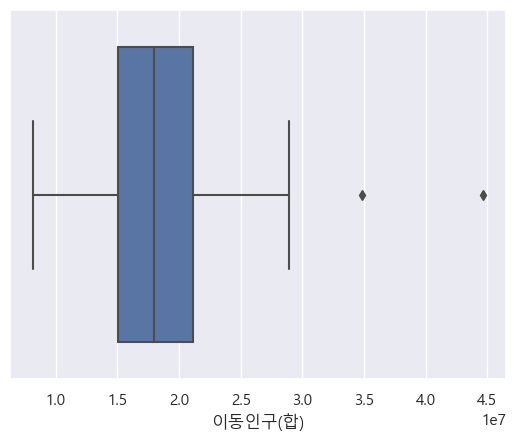

In [75]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.boxplot(x="이동인구(합)", data=move_people_sum, showfliers=True, whis=1.5)

In [78]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 이동인구가 가장 많은 곳은 성북구, 가장 적은 곳은 금천구이다.
# 2. 평균 이동시간이 가장 많은 곳은 강동구, 가장 적은 곳은 중구이다.
# 3.

---